# Fourier transform
- Börge Göbel

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

## Recall integrals

In [5]:
def integralTrapezoidal(data):
    a = 0
    for i in range( len(data[0]) - 1 ):
        a = a + ( data[1,i+1] + data[1,i] ) / 2 * ( data[0,i+1] - data[0, i] )
    return a

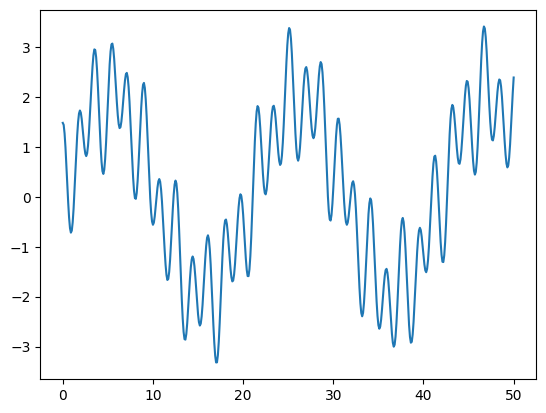

In [9]:
tList = np.linspace(0,50,501)

freq1 = 2.0
freq2 = 0.3
freq3 = 3.5

yList = 0.5*np.cos(tList*freq1+0.3) + 2.0*np.sin(tList*freq2) + 1.0*np.cos(tList*freq3)

data = np.array([tList, yList])

plt.plot(data[0],data[1])

In [11]:
integralTrapezoidal(data)

11.373146764083113

## Fourier transform to find characteristic frequencies

$
\tilde{y}(\omega) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} y(t) e^{i\omega t}\mathrm{d}t
$

In [13]:
omega = 0.3

integrand = np.array([tList, 1/np.sqrt(2*np.pi) * yList * np.exp(1j*omega*tList)])

print(abs(integralTrapezoidal(integrand))**2)

420.16655955096377


In [15]:
ft = np.array(
    [[om,
     integralTrapezoidal(np.array([tList, 1/np.sqrt(2*np.pi) * yList * np.exp(1j*om*tList)]))] for om in np.linspace(0,10,1001)
    ]
)

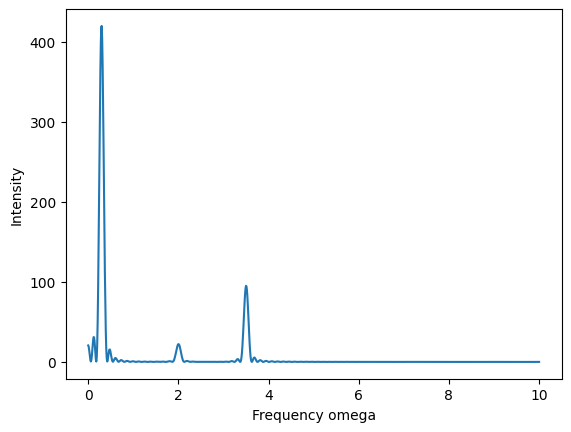

In [17]:
plt.xlabel("Frequency omega")
plt.ylabel("Intensity")

plt.plot(ft[:,0].real, abs(ft[:,1])**2)

## Use numpy module: Fast Fourier transform (FFT)

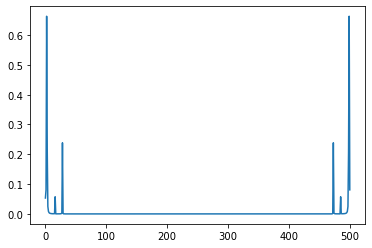

In [11]:
ft = np.fft.fft(yList)/len(yList)

plt.plot(abs(ft)**2 ) 

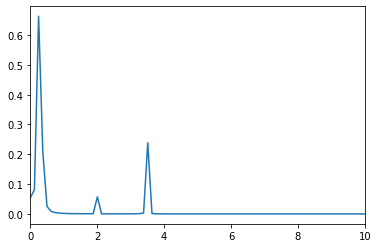

In [12]:
frequencies = np.arange(len(yList)) / ( len(yList)*0.1 )

plt.xlim([0, 10])
plt.plot( frequencies*2*np.pi, abs(ft)**2 ) 